# Калмыков Я.А. КЭ-319 ЮУрГУ
# Лабораторная работа по вычислительным методам.
# Численное интегрирование (Метод правых прямоугольников)


* **Дана функция $y=arctg(x)$ на отрезке $[-1;1]$. Найти её численный определённый интеграл на всём промежутке.** 

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
""" Импорт необходимых библиотек
math - элементарные математические операции и константы
pandas - создание и редактирование DataFram'ов
matplot - создание и работа с графиками
"""


n=10 # количество разбиений
a=-1 # левая граница
b=1 # правая граница
h=(b-a)/n # шаг
xi=[] # точки разбиения
vi=[] # значения фукнции в точках разбиения
sum=[] # численная сумма
sum1=[] # значения интеграллов в точках разбиения (точное значение)
err=[] # погрешность
s, s1 = 0, 0 # промежуточные значения

**Для решения поставленной задачи используем метод правых прямоугольников**

In [2]:
# Исходная функция
def y(x):
  return math.atan(x)

# Точное значение интеграла
def f(x):
  return x*math.atan(x)-(math.pi)/4-math.log(1+x**2)/2+math.log(2)/2

# Функция интегральной суммы
def sigma(sum,vi,i):
  global s # промежуточное значение
  s = round((s+vi[i-1]*h),7) # интегральная сумма от левой границы до точки разбиения
  sum.append(s) # добавление в столбец

""" Цикл прохода """


for i in range(1,n+2):
  xi.append(a+(i-1)*h) # добавление точек разбиения
  vi.append(y(xi[i-1])) # добавление значения функции в точках разбиения
  sigma(sum,vi,i) # подсчёт численного решения (Интегральная сумма)
  s1=f(xi[i-1]) # точное значение интеграла от левой границы до точки разбиения
  sum1.append(s1) # массив точных значений
  err.append(s1-s) # погрешность в точке разбиения 

**Создадим DataFrame для удобства работы и обработки данных**

In [3]:
"""Создание DataFram'а при помощи библиотеки Pandas"""
df = pd.DataFrame(index=list(range(1,n+2)))


df['xi']=(xi) # столбец точек разбиения
df['vi']=vi # столбец значений функции в точках разбиения
df['Si=Σvih']=sum # столбец интегральной суммы
df['S*']=sum1 # столбец точных значений
df['|Si-S*|']=err # столбец погрешностей

print(df) # вывод данных

     xi        vi   Si=Σvih        S*   |Si-S*|
1  -1.0 -0.785398 -0.157080  0.000000  0.157080
2  -0.8 -0.674741 -0.292028 -0.146380  0.145648
3  -0.6 -0.540420 -0.400112 -0.268315  0.131796
4  -0.4 -0.380506 -0.476213 -0.360832  0.115381
5  -0.2 -0.197396 -0.515692 -0.418956  0.096736
6   0.0  0.000000 -0.515692 -0.438825  0.076868
7   0.2  0.197396 -0.476213 -0.418956  0.057257
8   0.4  0.380506 -0.400112 -0.360832  0.039280
9   0.6  0.540420 -0.292028 -0.268315  0.023713
10  0.8  0.674741 -0.157080 -0.146380  0.010700
11  1.0  0.785398  0.000000  0.000000  0.000000




#              **Вывод графиков и вывод данных в Excel и CSV**



**График функции $y=arctgx$ на отрезке $[-1;1]$**

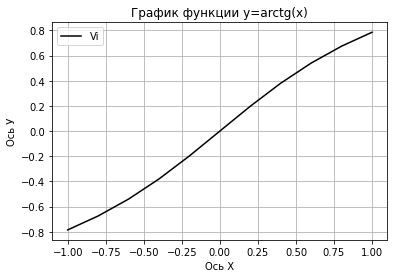

In [4]:
df.plot(x="xi",y="vi",color='black', linewidth=1.5, marker='',  label='Vi')

ax = plt.gca()  # получаем текущий объект Axes
ax.set_title("График функции y=arctg(x)")
ax.grid(True)
ax.set_xlabel('Ось Х')
ax.set_ylabel('Ось У')
ax.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/График функции y=arctg(x).png',dpi=1000)

**График функции численного решения**

---
---

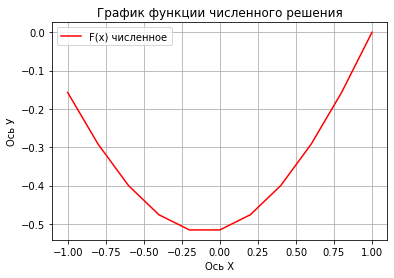

In [5]:
df.plot(x='xi',y="Si=Σvih",color='red', linewidth=1.5, marker='',  label='F(x) численное')
bx = plt.gca()  # получаем текущий объект Axes
bx.set_title("График функции численного решения")
bx.grid(True)
bx.set_xlabel('Ось Х')
bx.set_ylabel('Ось У')
bx.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/График численного решения.png',dpi=1000,quality=95)

**График аналитического решения**

---
---

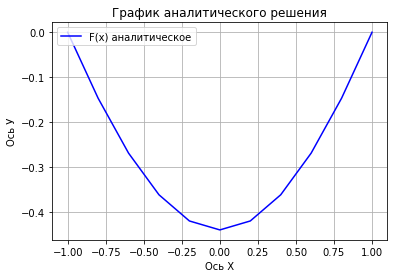

In [6]:
df.plot(x='xi',y="S*",color='blue', linewidth=1.5, marker='',  label='F(x) аналитическое')
cx = plt.gca()  # получаем текущий объект Axes
cx.set_title("График аналитического решения")
cx.grid(True)
cx.set_xlabel('Ось Х')
cx.set_ylabel('Ось У')
cx.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/График аналитического решения.png',dpi=1000,quality=95)

**Графика аналитического решения**

---
---

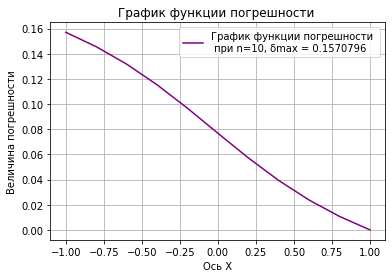

In [7]:
df.plot(x='xi',y="|Si-S*|",color='purple', linewidth=1.5, marker='',  label=(f'График функции погрешности \n при n={n}, δmax = {max(err)}'))
cx = plt.gca()  # получаем текущий объект Axes
cx.set_title("График функции погрешности ")
cx.grid(True)
cx.set_xlabel('Ось Х')
cx.set_ylabel('Величина погрешности')
cx.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/Оценка погрешности.png',dpi=1000,quality=95)

**Сохранение графика оценки погрешности на Google Drive**

---
---
---

 **Ячейка для вывода данных в CSV и EXCEL.**

In [8]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/data.csv')
df.to_excel('/content/drive/MyDrive/Colab Notebooks/Integration (Method right rectangles)/data.xlsx')